In [19]:
#imports
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as pyplot

In [17]:
# Loading the forecasts data set
forecasts = pd.read_csv('data/forecasts.csv')

In [3]:
#select only "humdata_exercise" as source from Germany, and group by nuts code
humdata = forecasts[(forecasts['source'] == 'humdata_exercise')]
grouped = humdata.groupby(['nuts_code']).sum()
grouped.head()

,uniqueid,no_persons,is_forecast,confidence_lower,confidence_upper
nuts_code,,,,,
AT,62766,283332,False,0.0,0.0
EL,47680,243364,False,0.0,0.0
HR,53063,264425,False,0.0,0.0
HU,53561,84950,False,0.0,0.0
IT,45873,9585,False,0.0,0.0


In [4]:
#load nuts code level 0
# Source: https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts
shapefile_nuts0 = 'data/NUTS_RG_01M_2016_4326_LEVL_0.shp/NUTS_RG_01M_2016_4326_LEVL_0.shp'
# Resolve countries into shapes
nuts0_shapes = gpd.read_file(shapefile_nuts0)
nuts0_shapes.head()

,LEVL_CODE,NUTS_ID,CNTR_CODE,NUTS_NAME,FID,geometry
0,0,AL,AL,SHQIPÃRIA,AL,"MULTIPOLYGON (((19.83100 42.46645, 19.83568 42..."
1,0,CZ,CZ,ÄESKÃ REPUBLIKA,CZ,"POLYGON ((14.49122 51.04353, 14.49945 51.04610..."
2,0,DE,DE,DEUTSCHLAND,DE,"MULTIPOLYGON (((10.45444 47.55580, 10.43954 47..."
3,0,DK,DK,DANMARK,DK,"MULTIPOLYGON (((10.19436 56.68466, 10.20395 56..."
4,0,CY,CY,ÎÎ¥Î Î¡ÎÎ£,CY,"MULTIPOLYGON (((34.58451 35.69436, 34.57359 35..."


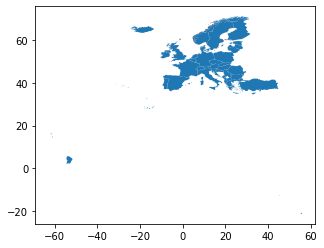

In [5]:
#plot shape file
nuts0_shapes.plot()

In [8]:
#merge data
merged = pd.merge(grouped[['no_persons']], nuts0_shapes, left_on='nuts_code', right_on='NUTS_ID')
#make geo file again
merged = gpd.GeoDataFrame(merged, geometry='geometry')

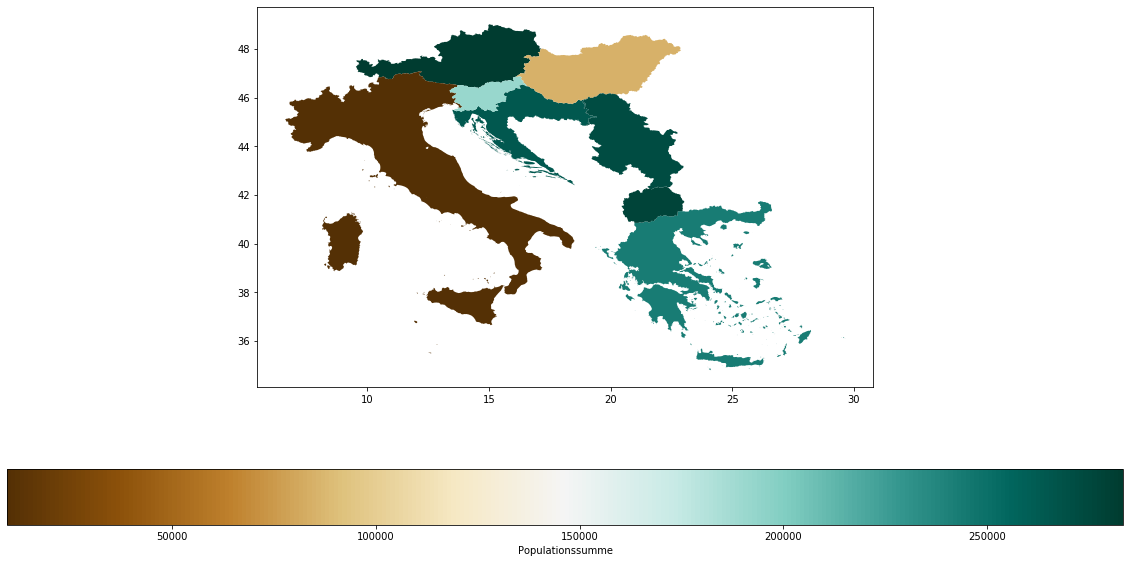

In [11]:
#plot merged data
fig,ax = pyplot.subplots(1, 1,figsize=(20, 10))
merged.plot(column='no_persons',ax=ax, legend=True,cmap='BrBG',legend_kwds={'label': "Populationssumme", 'orientation': "horizontal"})

In [13]:
#display other countries as well
merged_all = pd.merge(grouped[['no_persons']], nuts0_shapes, left_on='nuts_code', right_on='NUTS_ID',how = 'right')

#replace NANs with 0
merged_all['no_persons'] = merged_all['no_persons'].fillna(0)

#make geo file again
merged_all = gpd.GeoDataFrame(merged_all, geometry='geometry')

#Filter out France for better visibility
merged_all = merged_all[merged_all['NUTS_ID'] != 'FR']

merged_all.head()

,no_persons,LEVL_CODE,NUTS_ID,CNTR_CODE,NUTS_NAME,FID,geometry
0,283332.0,0,AT,AT,ÃSTERREICH,AT,"MULTIPOLYGON (((10.45444 47.55580, 10.47320 47..."
1,243364.0,0,EL,EL,ÎÎÎÎÎÎ,EL,"MULTIPOLYGON (((26.35788 41.71110, 26.36917 41..."
2,264425.0,0,HR,HR,HRVATSKA,HR,"MULTIPOLYGON (((16.59681 46.47590, 16.59863 46..."
3,84950.0,0,HU,HU,MAGYARORSZÃG,HU,"MULTIPOLYGON (((22.12108 48.37831, 22.12632 48..."
4,9585.0,0,IT,IT,ITALIA,IT,"MULTIPOLYGON (((12.24075 47.06917, 12.23652 47..."


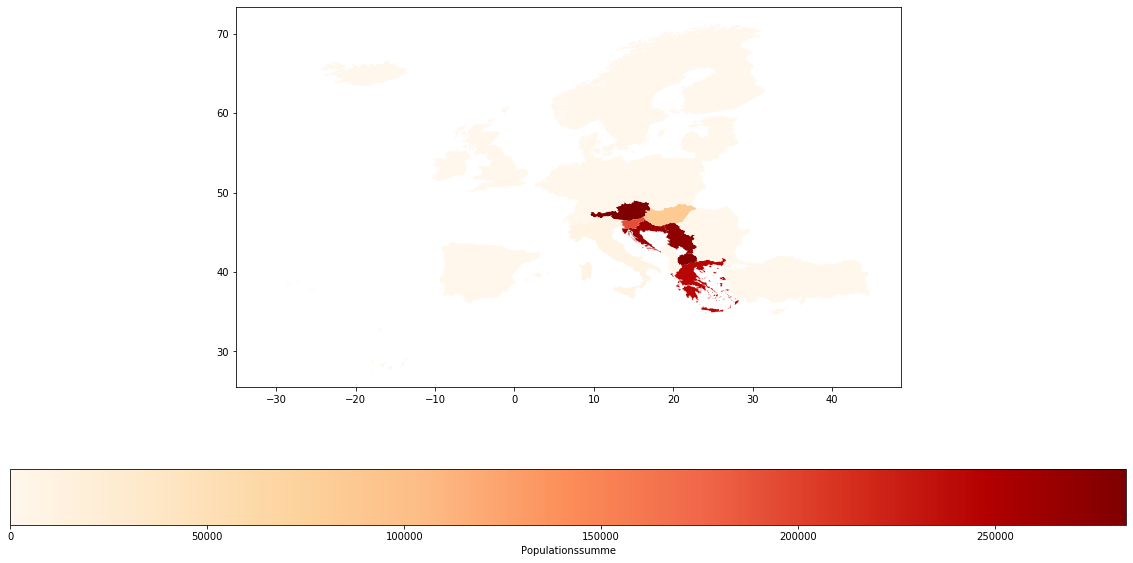

In [15]:
#plot merged data from all countries
fig, ax = pyplot.subplots(1, 1,figsize=(20, 10))
merged_all.plot(column='no_persons',ax=ax, legend=True,cmap='OrRd',legend_kwds={'label': "Populationssumme", 'orientation': "horizontal"})